In [1]:

!pip install pandas numpy matplotlib seaborn
!pip install scikit-learn
!pip install python-dateutil
!pip install pandas matplotlib ydata-profiling
!pip install ipywidgets pandas matplotlib seaborn scikit-learn


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34819 sha256=4be954b970f8d3e02cfcd1e5c517489ef612c41ff50c0db701f5f823ef59601d
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\4f\d7\32\c6c9b7b05e852e920fd72174487be3a0f18e633a7adcc303be
Successfully built pandoc


# Task 1: Data Handling

In [3]:
import pandas as pd
dongsi_df = pd.read_csv("C:\\Users\\hp\\Documents\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Dongsi_20130301-20170228.csv")
shunyi_df = pd.read_csv("C:\\Users\hp\\Documents\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_shunyi_20130301-20170228.csv")
huairou_df = pd.read_csv("C:\\Users\hp\\Documents\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_huairou_20130301-20170228.csv")
aotizhongxin_df = pd.read_csv("C:\\Users\hp\\Documents\\PRSA2017_Data_20130301-20170228\\PRSA_Data_20130301-20170228\\PRSA_Data_Aotizhongxin_20130301-20170228.csv")


In [8]:
dongsi_df['station'] = 'Dongsi'
shunyi_df['station'] = 'Shunyi'
huairou_df['station'] = 'Huairou'
aotizhongxin_df['station'] = 'Aotizhongxin'

combined_df = pd.concat([dongsi_df, shunyi_df, huairou_df, aotizhongxin_df], ignore_index=True)


# Task 2: Exploratory Data Analysis (EDA)

In [11]:
print(combined_df.shape)  # rows, columns
print(combined_df.dtypes)
print(combined_df.isnull().sum())  # missing values
print(combined_df.describe())  # statistical summary


(140256, 18)
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object
No            0
year          0
month         0
day           0
hour          0
PM2.5      3541
PM10       2596
SO2        3874
NO2        5628
CO         8573
O3         5023
TEMP        142
PRES        144
DEWP        147
RAIN        146
wd          944
WSPM        121
station       0
dtype: int64
               No           year          month            day           hour  \
count  140256.000  140256.000000  140256.000000  140256.000000  140256.000000   
mean    17532.500    2014.662560       6.522930      15.729637      11.500000   
std     10122.141       1.177201       3.448715       8.800123       6.922211   
min   

In [13]:
combined_df.dropna(inplace=True)



In [15]:
combined_df.drop_duplicates(inplace=True)


In [17]:
combined_df.head(10)



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
6,7,2013,3,1,6,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
7,8,2013,3,1,7,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi
8,9,2013,3,1,8,3.0,6.0,12.0,41.0,500.0,54.0,-0.3,1030.4,-21.2,0.0,NW,4.6,Dongsi
9,10,2013,3,1,9,3.0,6.0,9.0,31.0,400.0,69.0,0.4,1030.5,-23.3,0.0,N,5.5,Dongsi
10,11,2013,3,1,10,3.0,6.0,7.0,19.0,300.0,82.0,1.4,1030.2,-22.5,0.0,N,5.2,Dongsi
11,12,2013,3,1,11,6.0,6.0,7.0,19.0,400.0,83.0,2.9,1029.8,-22.9,0.0,NNW,5.3,Dongsi
12,13,2013,3,1,12,3.0,6.0,6.0,18.0,300.0,86.0,4.0,1028.6,-21.2,0.0,W,4.6,Dongsi


In [19]:
# Combine year, month, day, and hour into a datetime column
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])




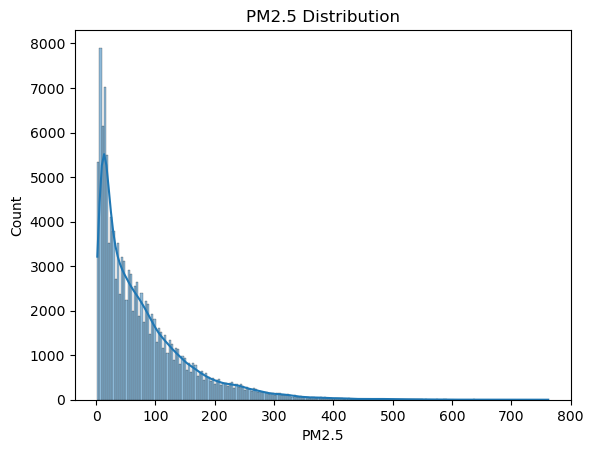

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(combined_df['PM2.5'], kde=True)
plt.title('PM2.5 Distribution')
plt.show()


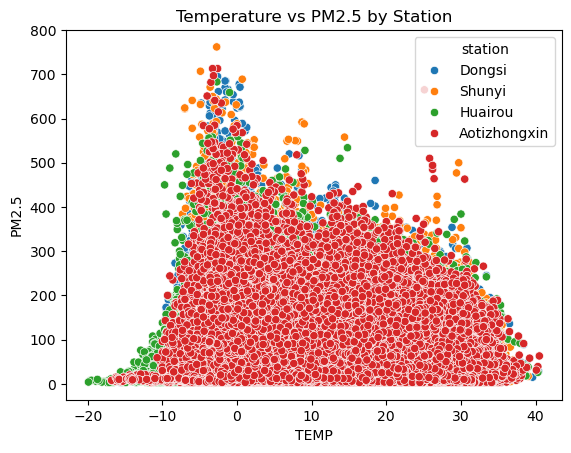

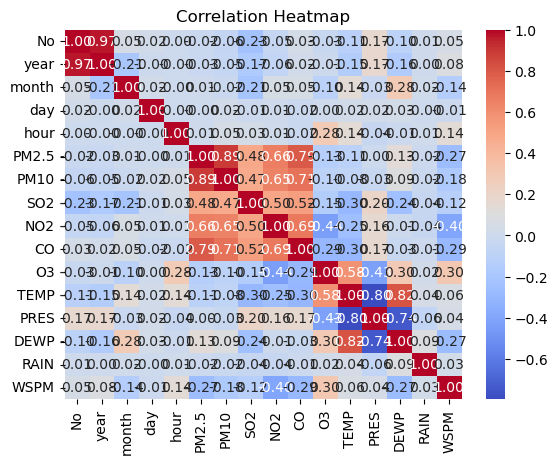

In [23]:
# Scatter plot of TEMP vs PM2.5 with hue by station
sns.scatterplot(x='TEMP', y='PM2.5', hue='station', data=combined_df)
plt.title("Temperature vs PM2.5 by Station")
plt.show()

# Heatmap of correlations
sns.heatmap(combined_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

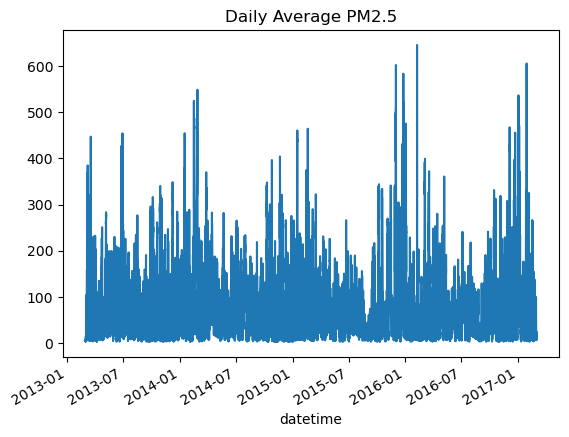

In [25]:
combined_df.groupby('datetime')['PM2.5'].mean().plot()
plt.title('Daily Average PM2.5')
plt.show()


# Task 3: Model Building

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming combined_df is already created and merged appropriately

# Define features and target
features = ['SO2', 'NO2', 'O3', 'CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
target = 'PM2.5'

# Ensure features and target exist in the dataframe
available_columns = combined_df.columns.tolist()
missing_columns = [col for col in features + [target] if col not in available_columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing in combined_df: {missing_columns}")

# Drop rows where any of the features or the target are NaN
combined_df = combined_df.dropna(subset=features + [target])

# Prepare X and y
X = combined_df[features]
y = combined_df[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)


Mean Squared Error (MSE): 920.5255768255904
R-squared Score (R²): 0.8515303962105267


# Task 4: Application development

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [ ]:
class DataApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Multipage Data Analysis App")
        self.geometry("1000x700")
        self.df = None
        
        nav_frame = tk.Frame(self)
        nav_frame.pack(side="top", fill="x")

        tk.Button(nav_frame, text="Load Data", command=self.load_data).pack(side="left", padx=10)
        tk.Button(nav_frame, text="Data Overview", command=self.show_overview).pack(side="left", padx=10)
        tk.Button(nav_frame, text="EDA", command=self.show_eda).pack(side="left", padx=10)
        tk.Button(nav_frame, text="Modeling", command=self.show_modeling).pack(side="left", padx=10)
        
        self.container = tk.Frame(self)
        self.container.pack(fill="both", expand=True)
        
        self.frames = {}
        for F in (OverviewPage, EDAPage, ModelingPage):
            page_name = F.__name__
            frame = F(parent=self.container, controller=self)
            self.frames[page_name] = frame
            frame.grid(row=0, column=0, sticky="nsew")

    def load_data(self):
        file_path = filedialog.askopenfilename(title="Select CSV", filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                df = pd.read_csv(file_path)
                df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
                self.df = df
                messagebox.showinfo("Success", "Data loaded successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Could not load data:\n{e}")

    def show_overview(self):
        self.frames["OverviewPage"].update_content()
        self.frames["OverviewPage"].tkraise()

    def show_eda(self):
        self.frames["EDAPage"].update_content()
        self.frames["EDAPage"].tkraise()

    def show_modeling(self):
        self.frames["ModelingPage"].update_content()
        self.frames["ModelingPage"].tkraise()


In [ ]:
class OverviewPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller
        self.text = tk.Text(self, wrap="word")
        self.text.pack(fill="both", expand=True)

    def update_content(self):
        df = self.controller.df
        self.text.delete("1.0", tk.END)
        if df is not None:
            self.text.insert(tk.END, f"Shape: {df.shape}\n\n")
            self.text.insert(tk.END, "Columns:\n")
            self.text.insert(tk.END, str(df.columns.tolist()) + "\n\n")
            self.text.insert(tk.END, "Head:\n")
            self.text.insert(tk.END, str(df.head()) + "\n\n")
            self.text.insert(tk.END, "Description:\n")
            self.text.insert(tk.END, str(df.describe().round(2)))
        else:
            self.text.insert(tk.END, "No data loaded.")


In [ ]:
class EDAPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller
        self.canvas = None

    def update_content(self):
        df = self.controller.df
        if df is not None:
            if self.canvas:
                self.canvas.get_tk_widget().destroy()

            fig, axs = plt.subplots(2, 2, figsize=(12, 8))
            sns.lineplot(data=df, x='datetime', y='PM2.5', ax=axs[0, 0])
            axs[0, 0].set_title('PM2.5 Over Time')

            sns.histplot(df['TEMP'].dropna(), kde=True, ax=axs[0, 1], bins=30, color='skyblue')
            axs[0, 1].set_title('Temperature Distribution')

            sns.boxplot(data=df, y='PM10', ax=axs[1, 0], color='lightgreen')
            axs[1, 0].set_title('PM10 Boxplot')

            sns.scatterplot(data=df, x='TEMP', y='PM2.5', ax=axs[1, 1])
            axs[1, 1].set_title('TEMP vs PM2.5')

            plt.tight_layout()

            self.canvas = FigureCanvasTkAgg(fig, master=self)
            self.canvas.draw()
            self.canvas.get_tk_widget().pack(fill="both", expand=True)
        else:
            messagebox.showwarning("Warning", "Please load data first.")


In [ ]:
class ModelingPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller
        self.output = tk.Text(self, height=15)
        self.output.pack(fill="both", expand=True)

    def update_content(self):
        df = self.controller.df
        self.output.delete("1.0", tk.END)
        if df is not None:
            try:
                df_clean = df.dropna()
                X = df_clean[['TEMP']].values
                y = df_clean['PM2.5'].values

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
                model = LinearRegression()
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
                mse = mean_squared_error(y_test, predictions)

                self.output.insert(tk.END, f"Linear Regression: PM2.5 ~ TEMP\n")
                self.output.insert(tk.END, f"Intercept: {model.intercept_:.2f}\n")
                self.output.insert(tk.END, f"Coefficient: {model.coef_[0]:.2f}\n")
                self.output.insert(tk.END, f"MSE: {mse:.2f}\n")
            except Exception as e:
                self.output.insert(tk.END, f"Error during modeling: {e}")
        else:
            self.output.insert(tk.END, "No data loaded.")


In [ ]:
app = DataApp()
app.mainloop()
